In [23]:
import numpy as np
from pandas import read_csv
import pandas_datareader.data as web

In [24]:
doge = web.DataReader('DOGE-USD', 'yahoo')
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,0.001415,0.001181,0.001207,0.001415,6259550,0.001415
2017-11-10,0.001431,0.001125,0.001421,0.001163,4246520,0.001163
2017-11-11,0.001257,0.001141,0.001146,0.001201,2231080,0.001201
2017-11-12,0.001210,0.001002,0.001189,0.001038,3288960,0.001038
2017-11-13,0.001212,0.001019,0.001046,0.001211,2481270,0.001211
...,...,...,...,...,...,...
2022-04-19,0.144141,0.139500,0.140297,0.142665,679511647,0.142665
2022-04-20,0.146241,0.139595,0.142677,0.140878,1068542289,0.140878
2022-04-21,0.142448,0.135255,0.140868,0.136365,740549793,0.136365


In [25]:
#lstm_data = np.genfromtxt('./sample_data/lstm.csv', delimiter=',', skip_header=True)
lstm_data = read_csv('lstmdoge.csv')
lstm_data = lstm_data.drop(['Date'], axis=1)
print(lstm_data)

        High       Low      Open     Close      Volume  Adj Close  \
0   0.174406  0.168271  0.174406  0.170088   505900382   0.170088   
1   0.138747  0.135565  0.137213  0.137541   383506507   0.137541   
2   0.133649  0.127810  0.132998  0.129610   518193386   0.129610   
3   0.148558  0.137088  0.138903  0.146453  1047399132   0.146453   
4   0.172339  0.168128  0.170151  0.168803   541922892   0.168803   
5   0.147592  0.137250  0.137523  0.147503   580740990   0.147503   
6   0.129856  0.121544  0.129631  0.122591   650665594   0.122591   
7   0.155312  0.142008  0.146413  0.148591  2253509569   0.148591   
8   0.157354  0.144031  0.144379  0.148948  1581065491   0.148948   
9   0.116231  0.110686  0.115080  0.111608   373430106   0.111608   
10  0.142608  0.137067  0.138070  0.140080   890728707   0.140080   
11  0.150132  0.143649  0.148869  0.146003   898042727   0.146003   
12  0.118967  0.110817  0.111607  0.114048   822092169   0.114048   
13  0.146633  0.138101  0.140053  

In [26]:
lstm_data_X = lstm_data.drop(['Close'], axis=1)
lstm_data_y = lstm_data['Close']

In [27]:
look_back = 5 # how many days to look back
batch_size = 3 # size of batches used when training
n_feat = 6 # number of features 
n_target = 2
n_validation = 6
n_test = 8
n_train = lstm_data_X.shape[0] - n_validation - n_test - 1


In [28]:
n_train

39

In [29]:
#lstm_data_X_train = lstm_data_X.iloc[:30,:]
#lstm_data_X_val = lstm_data_X.iloc[30:40,:]
#lstm_data_X_test = lstm_data_X.iloc[40:52,:]

#lstm_data_y_train = lstm_data_y.iloc[:30]
#lstm_data_y_val = lstm_data_y.iloc[30:40]
#lstm_data_y_test = lstm_data_y.iloc[40:52]
# Convert to numpy arrays
#X_train = lstm_data_X_train.to_numpy()
#X_val = lstm_data_X_val.to_numpy()
#X_test = lstm_data_X_test.to_numpy()
#y_train = lstm_data_y_train.to_numpy()
#y_val = lstm_data_y_val.to_numpy()
#y_test = lstm_data_y_test.to_numpy()

In [30]:
lstm_data_X_train = lstm_data_X.iloc[:n_train,:]
lstm_data_X_val = lstm_data_X.iloc[n_train:n_train + n_validation,:]
lstm_data_X_test = lstm_data_X.iloc[n_train + n_validation:n_train + n_validation + n_test,:]

lstm_data_y_train = lstm_data_y.iloc[:n_train]
lstm_data_y_val = lstm_data_y.iloc[n_train:n_train + n_validation]
lstm_data_y_test = lstm_data_y.iloc[n_train + n_validation:n_train + n_validation + n_test]
# Convert to numpy arrays
X_train = lstm_data_X_train.to_numpy()
X_val = lstm_data_X_val.to_numpy()
X_test = lstm_data_X_test.to_numpy()
y_train = lstm_data_y_train.to_numpy()
y_val = lstm_data_y_val.to_numpy()
y_test = lstm_data_y_test.to_numpy()

In [31]:
X_test

array([[1.30070999e-01, 1.26199007e-01, 1.27568007e-01, 5.35575654e+08,
        1.27646998e-01, 1.41458700e-01],
       [1.36494994e-01, 1.29877999e-01, 1.31009996e-01, 6.10401998e+08,
        1.35867998e-01, 2.27658000e-01],
       [1.28234997e-01, 1.22052997e-01, 1.27638996e-01, 5.92809151e+08,
        1.23111002e-01, 1.99485454e-01],
       [1.44858003e-01, 1.35702997e-01, 1.35900006e-01, 1.44501956e+09,
        1.44731998e-01, 1.69029840e-01],
       [1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.65755924e+08,
        1.33156002e-01, 1.31502325e-01],
       [1.52737007e-01, 1.42456993e-01, 1.44724995e-01, 1.47687551e+09,
        1.42656997e-01, 1.53586280e-01],
       [1.48559004e-01, 1.41289994e-01, 1.42556995e-01, 9.61074557e+08,
        1.44470006e-01, 1.14973180e-01],
       [1.44997001e-01, 1.39880002e-01, 1.44455999e-01, 8.84305263e+08,
        1.43209994e-01, 1.07060620e-01]])

In [32]:
y_test

array([0.127647  , 0.135868  , 0.123111  , 0.144732  , 0.133156  ,
       0.142657  , 0.14447001, 0.14320999])

In [33]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [34]:
train_data_gen = TimeseriesGenerator(X_train, y_train, length=look_back, batch_size=batch_size)
val_data_gen = TimeseriesGenerator(X_val, y_val, length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length=look_back, batch_size=batch_size)

In [35]:
# check generator dimensions
for i in range(len(train_data_gen)):
    x, y = train_data_gen[i]
    print(x.shape, y.shape)

(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(1, 5, 6) (1,)


In [36]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(look_back, n_feat), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss='mse', metrics=["mse"])
print(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 32)             4992      
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
hist = model_lstm.fit_generator(train_data_gen,
                                        steps_per_epoch=10,
                                        epochs=20,
                                        verbose=1,
                                        validation_data=val_data_gen)

Epoch 1/20


C:\Users\moham\AppData\Local\Temp/ipykernel_18704/192094070.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_lstm.fit_generator(train_data_gen,


10/10 [==============================] - 4s 105ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2/20
10/10 [==============================] - 0s 14ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 9.0681e-04 - val_mse: 9.0681e-04
Epoch 3/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 5.8566e-04 - val_mse: 5.8566e-04
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 4.1337e-05 - val_mse: 4.1337e-05
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 8/20
10/10 [==============================] - 0s 11ms/step - lo

In [38]:
pred = model_lstm.predict(test_data_gen)

In [39]:
test_data_gen[0]

(array([[[1.30070999e-01, 1.26199007e-01, 1.27568007e-01, 5.35575654e+08,
          1.27646998e-01, 1.41458700e-01],
         [1.36494994e-01, 1.29877999e-01, 1.31009996e-01, 6.10401998e+08,
          1.35867998e-01, 2.27658000e-01],
         [1.28234997e-01, 1.22052997e-01, 1.27638996e-01, 5.92809151e+08,
          1.23111002e-01, 1.99485454e-01],
         [1.44858003e-01, 1.35702997e-01, 1.35900006e-01, 1.44501956e+09,
          1.44731998e-01, 1.69029840e-01],
         [1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.65755924e+08,
          1.33156002e-01, 1.31502325e-01]],
 
        [[1.36494994e-01, 1.29877999e-01, 1.31009996e-01, 6.10401998e+08,
          1.35867998e-01, 2.27658000e-01],
         [1.28234997e-01, 1.22052997e-01, 1.27638996e-01, 5.92809151e+08,
          1.23111002e-01, 1.99485454e-01],
         [1.44858003e-01, 1.35702997e-01, 1.35900006e-01, 1.44501956e+09,
          1.44731998e-01, 1.69029840e-01],
         [1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.6

In [40]:
pred

array([[0.1476606],
       [0.1476606],
       [0.1476606]], dtype=float32)

In [41]:
import matplotlib.pyplot as plt

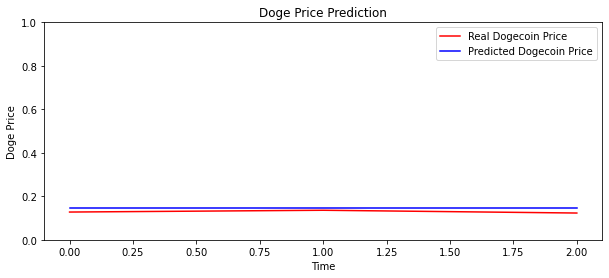

In [45]:
# Visualising the results
plt.figure(figsize=(10,4))
plt.plot(y_test[0:y_test.shape[0]-5], color = 'red', label = 'Real Dogecoin Price')
plt.plot(pred, color = 'blue', label = 'Predicted Dogecoin Price')
plt.title('Doge Price Prediction')
plt.xlabel('Time')
plt.ylabel('Doge Price')
plt.ylim(0,1)
plt.legend()
plt.show()